In [ ]:
## libraries and set-up

library(tidyverse)

textsize <- 6
titlesize <- 7

In [2]:
# summary_tag_counts.csv output from 5P-Cap-seq-processing/subsampling.smk [Figure created within workflow; shown here for easy reproducability]
tagcounts <- read_csv('Supplemental_Figure1_data/summary_tag_counts.csv', show_col_types = FALSE) %>%
    pivot_longer(-reads, names_to="sample", values_to="tags") %>%
    separate(sample, into=c("id", "type"), sep="_", remove=FALSE) %>%
    drop_na

p <- ggplot(tagcounts,
            aes(x=reads/10^6, y=tags/10^6, group=sample, color=id, shape=type)) +
    geom_point() +
    geom_line() +
    scale_color_brewer(type="qual", palette = "Dark2") +
    labs(x="Number of molecules [x10^6]",
         y="Number of TSS [x10^6]",
         shape = "Stage",
         color = "Sample ID") +
    guides(color=guide_legend(nrow=2,byrow=TRUE)) +
    cowplot::theme_cowplot() +
    theme(legend.position = "bottom",
          legend.direction = "horizontal",
          legend.box="vertical",
          axis.text = element_text(size=textsize),
          legend.text = element_text(size=textsize),
          axis.title = element_text(size=titlesize),
          legend.title = element_text(size=titlesize))
ggsave(plot=p, filename = 'Supplemental_Panels/SFig1B.pdf',
       height = 9, width=6,  units = "cm")

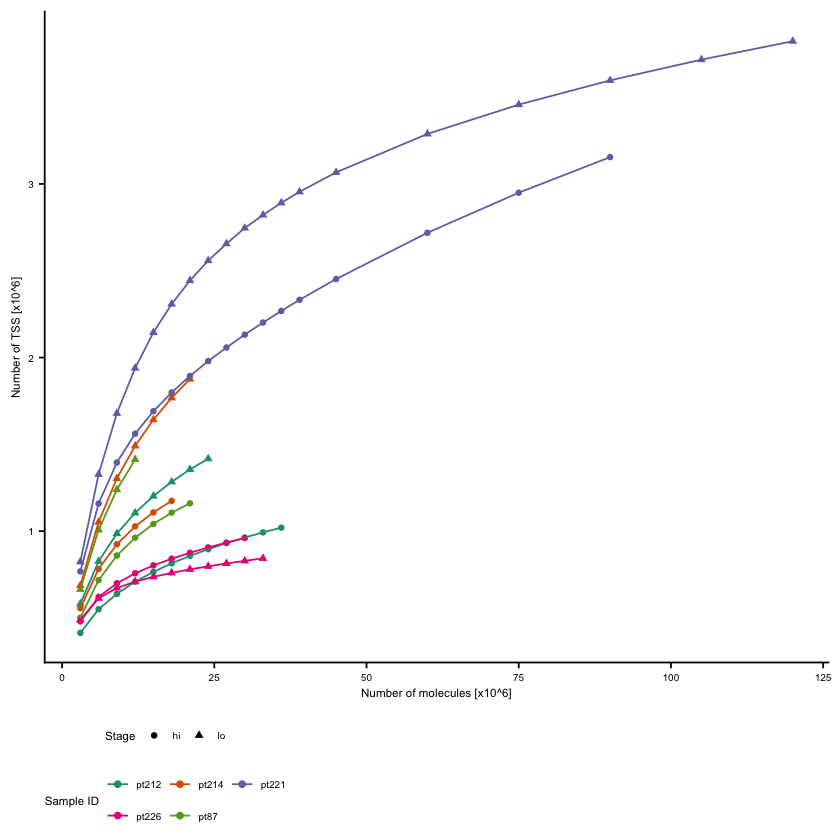

In [6]:
p